<h1 align="center"> LeetCode Algorithms I: Problems and Solutions</h1>

<h3 align="center"><a href=https://leetcode.com/study-plan/algorithm/>Problems</a></h3>

---

In [1]:
import random
from tqdm import tqdm
import collections

# Day 1: Binary Search Problems

## 704. Binary Search

Given an array of integers `nums` which is sorted in ascending order, and an integer `target`, write a function to search `target` in `nums`. If `target` exists, then return its index. Otherwise, return `-1`.

You must write an algorithm with `O(log n)` runtime complexity.

<b>Example 1:</b><br>
```
- Input: nums = [-1,0,3,5,9,12], target = 9
- Output: 4
- Explanation: 9 exists in nums and its index is 4

```

<b>Example 2:</b><br>
```
- Input: nums = [-1,0,3,5,9,12], target = 2
- Output: -1
- Explanation: 2 does not exist in nums so return -1
```

<b>Constraints:</b><br>
- 1 <= nums.length <= 104
- -104 < nums[i], target < 104
- All the integers in nums are unique.
- nums is sorted in ascending order.


<ins>Notes:</ins><br>
Given that this specifies O(log n) complexity - linear scan won't do <br>

Main notes from realpython's <a href="https://realpython.com/binary-search-python/">article</a> on binary search
- need a sorted list (list is already sorted in this case)

In [2]:
class Solution:
    
    def search(self, nums: list, target: int) -> int:
        
        left, right = 0, len(nums) - 1

        while left <= right:
            middle = (left + right) // 2

            if nums[middle] == target:
                return middle

            if nums[middle] < target:
                left = middle + 1
                
            elif nums[middle] > target:
                right = middle - 1

        return -1       

In [3]:
nums = random.sample(range(100), 20)
nums.sort()
target = nums[random.randint(1, 19)]
print(nums)
print(target)

[8, 11, 12, 14, 15, 23, 28, 29, 34, 38, 39, 47, 52, 55, 56, 62, 66, 69, 86, 88]
11


In [4]:
sol = Solution().search(nums, target)
print(sol)

1


## 278. First Bad Version

You are a product manager and currently leading a team to develop a new product. Unfortunately, the latest version of your product fails the quality check. Since each version is developed based on the previous version, all the versions after a bad version are also bad.

Suppose you have `n` versions `[1, 2, ..., n]` and you want to find out the first bad one, which causes all the following ones to be bad.

You are given an API `bool isBadVersion(version)` which returns whether `version` is bad. Implement a function to find the first bad version. You should minimize the number of calls to the API.

In [5]:
# The isBadVersion API is already defined for you.
# def isBadVersion(version: int) -> bool:

class Solution:

    def firstBadVersion(self, versions) -> int:
    
        n = len(versions)
        
        lower, upper = 1, n

        while lower <= upper:
            
            middle = (lower + upper) // 2
        
            bad = versions[middle]
            
            if bad:
                result = middle
                upper = middle-1 
                
            if not bad:
                lower = middle+1
        
        # add 1 to result as this method indexes a list and we're looking for the nth element
        result+=1
        
        return result

In [6]:
versions = [False] * 36 + [True] * 5

Solution().firstBadVersion(versions)

37

## 35. Search Insert Position

Given a sorted array of distinct integers and a target value, return the index if the target is found. If not, return the index where it would be if it were inserted in order.

You must write an algorithm with O(log n) runtime complexity.


Example 1:

```
Input: nums = [1,3,5,6], target = 5
Output: 2
```

Example 2:

```
Input: nums = [1,3,5,6], target = 2
Output: 1
```

Example 3:

```
Input: nums = [1,3,5,6], target = 7
Output: 4
```

Constraints:

- 1 <= nums.length <= 104
- -104 <= nums[i] <= 104
- nums contains distinct values sorted in ascending order.
- -104 <= target <= 104

In [7]:
class Solution:
    def searchInsert(self, nums: list, target: int) -> int:
        
        l, r = 0, len(nums)-1
        
        while l <= r:
            
            mid = (l + r) // 2
            
            if nums[mid] == target:
                return mid
            
            elif target < nums[mid]:
                r = mid-1
                
            else:
                l = mid+1                   
                
        return l

In [8]:
def dumbSearch(nums, target):
    
    for i, num in enumerate(nums):
        if num == target:
            return i
        elif target < num:
            return i

In [9]:
top =  int(1e9)
nums = random.sample(range(top), int(1e7))
nums.sort()

In [10]:
target = random.randint(0, top)

In [11]:
%%time

dumbSearch(nums, target)

Wall time: 413 ms


2119081

In [12]:
%%time 

Solution().searchInsert(nums, target)

Wall time: 0 ns


2119081

---

# Day 2: Two Pointers

## 977. Squares of a Sorted Array

Given an integer array nums sorted in non-decreasing order, return an array of the squares of each number sorted in non-decreasing order.

<b>Example 1:</b>

```
Input: nums = [-4,-1,0,3,10]
Output: [0,1,9,16,100]
Explanation: After squaring, the array becomes [16,1,0,9,100].
After sorting, it becomes [0,1,9,16,100].
```
    
<b>Example 2:</b>

```
Input: nums = [-7,-3,2,3,11]
Output: [4,9,9,49,121]
```

In [13]:
class trivialSolution:
    def sortedSquares(self, nums: list) -> list:
        
        """
        This approach will 
        square all of the numbers in the list, 
        use python's inbuilt sort() method on the list of squares
        """
        
        squared_nums = [num**2 for num in nums]
        squared_nums.sort()
        
        return squared_nums

In [14]:
nums = [-7,-3,2,3,11]
result = trivialSolution().sortedSquares(nums)
print(result)

[4, 9, 9, 49, 121]


<b> Follow up: </b>

Squaring each element and sorting the new array is very trivial, could you find an O(n) solution using a different approach?

In [15]:
class Solution:
    def sortedSquares(self, nums: list) -> list:
        """
        Title of the problem hints to use two pointers.
        
        This makes use of the properties of square numbers: that the 
        square of a number is equal to the square of its negative counterpart.
        
        >> create answer array to input numbers
        >> initialise two pointers: left and right
        
        >> while the pointers do not 'overlap' ( left <= right )
            >> compare absolute value of nums[left] and nums[right]
            >> if left number is greater than right number
                >> add 
                >> step uo the list from the left
        """
        
        answer = [0] * len(nums)
        l, r = 0, len(nums)-1
        
        while l <= r:            
            if abs(nums[l]) > abs(nums[r]):
                answer[r-l] = nums[l] ** 2
                l += 1 
            else:
                answer[r-l] = nums[r] ** 2
                r -= 1
        return answer

In [16]:
nums = [-7,-3,2,3,11]
result = Solution().sortedSquares(nums)
print(result)

[4, 9, 9, 49, 121]


#### time test

In [17]:
nums = random.sample(range(-int(1e9), int(1e9)), int(1e6))
nums.sort()

In [18]:
%%time
result = trivialSolution().sortedSquares(nums)
print(result[0:11])

[159201, 1081600, 1142761, 2111209, 17825284, 24581764, 39576681, 43007364, 45724644, 51408900, 76895361]
Wall time: 401 ms


In [19]:
%%time
result = Solution().sortedSquares(nums)
print(result[0:11])

[159201, 1081600, 1142761, 2111209, 17825284, 24581764, 39576681, 43007364, 45724644, 51408900, 76895361]
Wall time: 543 ms


<b>need fast</b>

although the two pointer pattern implemented does work, it's slower than the trivial solution in the way that it's currently implemented.

Use a <a href="https://docs.python.org/3/library/collections.html#collections.deque"> Deque</a>

Deque (Doubly Ended Queue, pronounced 'deck') in Python is implemented using the module “collections“. Deque is preferred over a list in the cases where we need quicker append and pop operations from both the ends of the container, as deque provides an O(1) time complexity for append and pop operations as compared to list which provides O(n) time complexity.

In [20]:
class Solution:
    def sortedSquares(self, nums: list) -> list:
        
        answer = collections.deque()
        l, r = 0, len(nums) - 1
        
        while l <= r:
            left, right = abs(nums[l]), abs(nums[r])
            if left > right:
                answer.appendleft(left * left)
                l += 1
            else:
                answer.appendleft(right * right)
                r -= 1
        return list(answer)

In [21]:
%%time
result = Solution().sortedSquares(nums)
print(result[0:11])

[159201, 1081600, 1142761, 2111209, 17825284, 24581764, 39576681, 43007364, 45724644, 51408900, 76895361]
Wall time: 386 ms


## 189. Rotate Array

Given an array, rotate the array to the right by k steps, where k is non-negative.


<b>Example 1:</b>
```
Input: nums = [1,2,3,4,5,6,7], k = 3
Output: [5,6,7,1,2,3,4]
Explanation:
rotate 1 steps to the right: [7,1,2,3,4,5,6]
rotate 2 steps to the right: [6,7,1,2,3,4,5]
rotate 3 steps to the right: [5,6,7,1,2,3,4]
```

<b>Example 2:</b>
```
Input: nums = [-1,-100,3,99], k = 2
Output: [3,99,-1,-100]
Explanation: 
rotate 1 steps to the right: [99,-1,-100,3]
rotate 2 steps to the right: [3,99,-1,-100]
```

In [22]:
class Solution:
    def rotate(self, nums: list, k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        for i in range(k):
            nums.insert(0, nums.pop())
        
        # for debugging, return the list
        return nums

In [23]:
nums = [1,2,3,4,5,6,7]
k = 3 

result = Solution().rotate(nums, k)
result

[5, 6, 7, 1, 2, 3, 4]

In [24]:
class Solution:
    def rotate(self, nums: list, k: int) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        n = len(nums)
        if k ==0:
            return
        if k > n:
            k = k%n
        if k > 0:
            nums[:] = nums[-k:] + nums[0:n-k]

In [25]:
nums = [1,2,3,4,5,6,7]
k = 3 

result = Solution().rotate(nums, k)
result

---

# Day 3: Two Pointers

## 283. Move Zeroes

Given an integer array nums, move all 0's to the end of it while maintaining the relative order of the non-zero elements.

Note that you must do this in-place without making a copy of the array.

<b>Example 1:</b>
```
Input: nums = [0,1,0,3,12]
Output: [1,3,12,0,0]
```
<b>Example 2:</b>
```
Input: nums = [0]
Output: [0]
```

#### create test 

In [26]:
nums_length = int(1e5)
nums_max = int(1e6)

# create array
nums = random.sample(range(nums_max), nums_length)

# create random list of indexes
zeros = random.sample(range(nums_length), nums_length//10)

# assign 0s to indexes
for idx in zeros:
    nums[idx] = 0

#### slow method

In [27]:
class Solution:
    def moveZeroes(self, nums: list) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        for i in tqdm(range(len(nums))):
            if not nums[i]:
                nums.pop(i)
                nums.append(0)
        return nums

In [28]:
%%time
result = Solution().moveZeroes(nums)

100%|██████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 925713.05it/s]

Wall time: 147 ms


#### faster: two pointers

In [29]:
class Solution:
    def moveZeroes(self, nums: list) -> None:
        """
        Do not return anything, modify nums in-place instead.
        """
        
        i = 0
        
        for j in range(len(nums)):
            if nums[j] != 0:
                nums[j], nums[i] = nums[i], nums[j]
                i+=1        
        
        return nums

#### nice visual
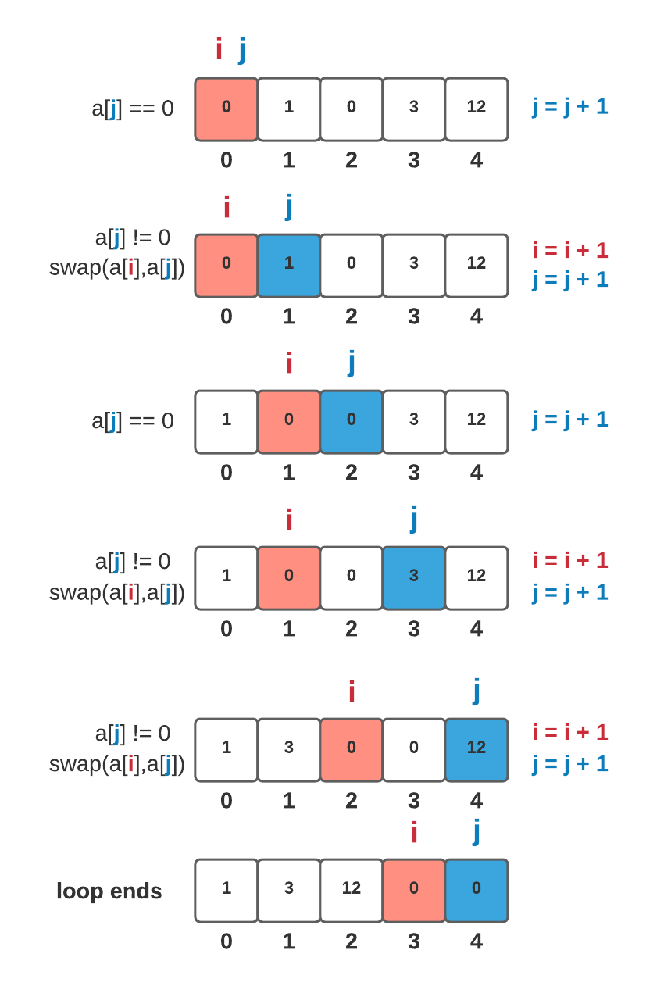

In [30]:
%%time
result = Solution().moveZeroes(nums)

Wall time: 20 ms


## 167. Two Sum II - Input Array Is Sorted

Given a <b>1-indexed</b> array of integers `numbers` that is already <b>sorted in non-decreasing order</b>, find two numbers such that they add up to a specific `target` number. Let these two numbers be numbers, <code>[index <sub>1</sub>]</code> and numbers <code>[index <sub>2</sub>]</code> where <code>1 <= index<sub>1</sub> < index<sub>2</sub> <= numbers.length</code>.

Return the indices of the two numbers, index1 and index2, <b>added by one</b> as an integer array <code>[index <sub>1</sub>], [index <sub>2</sub>]</code> of length 2.

The tests are generated such that there is <b>exactly one solution</b>. You may not use the same element twice.

Your solution must use only constant extra space.

<b>Example 1:</b>
```
Input: numbers = [2,7,11,15], target = 9
Output: [1,2]
Explanation: The sum of 2 and 7 is 9. Therefore, index1 = 1, index2 = 2. We return [1, 2].
```
<b>Example 2:</b>
```
Input: numbers = [2,3,4], target = 6
Output: [1,3]
Explanation: The sum of 2 and 4 is 6. Therefore index1 = 1, index2 = 3. We return [1, 3].
```
<b>Example 3:</b>
```
Input: numbers = [-1,0], target = -1
Output: [1,2]
Explanation: The sum of -1 and 0 is -1. Therefore index1 = 1, index2 = 2. We return [1, 2].
```

<b>Notes</b>

Key to this is that the list is already sorted, and 1-indexed.

Being sorted, Binary Search can be used.

As before in Two Sum I, a hash table can be used. One pass is fastest.

Two pointers can also be used.

In [31]:
class Solution:
    def twoSumHash(self, numbers: list, target: int) -> list:
                
        hashmap = {}
        
        for i in range(len(numbers)):
            complement = target - numbers[i]
            print(i, hashmap, complement)
            if complement in hashmap:
                return [hashmap[complement]+1, i+1]
            hashmap[numbers[i]] = i
            
    def twoSumBinarySearch(self, numbers: list, target: int) -> list:
        
        return
        
        
    def twoSumTwoPointers(self, numbers: list, target: int) -> list:
        
        left, right = 0, len(numbers)-1
        
        while left<=right:
            complement = target - numbers[left]
            
            if numbers[right] == complement:
                return [left+1, right+1]
            
            elif numbers[right] > complement:
                right -= 1
                
            else:
                left +=1

In [32]:
numbers = [2,3,4,5,8,19,45,51]
target = 96
result = Solution().twoSumHash(numbers, target)
print(result)

0 {} 94
1 {2: 0} 93
2 {2: 0, 3: 1} 92
3 {2: 0, 3: 1, 4: 2} 91
4 {2: 0, 3: 1, 4: 2, 5: 3} 88
5 {2: 0, 3: 1, 4: 2, 5: 3, 8: 4} 77
6 {2: 0, 3: 1, 4: 2, 5: 3, 8: 4, 19: 5} 51
7 {2: 0, 3: 1, 4: 2, 5: 3, 8: 4, 19: 5, 45: 6} 45
[7, 8]


In [33]:
numbers = [2,3,4,5,8,19,45,51]
target = 96
result = Solution().twoSumTwoPointers(numbers, target)
print(result)

[7, 8]


---

## Day 4: More Two Pointers...

#### 344. Reverse String

Write a function that reverses a string. The input string is given as an array of characters s.

You must do this by modifying the input array in-place with O(1) extra memory.


<b>Example 1:</b>
```
Input: s = ["h","e","l","l","o"]
Output: ["o","l","l","e","h"]
```
<b>Example 2:</b>
```
Input: s = ["H","a","n","n","a","h"]
Output: ["h","a","n","n","a","H"]
```

In [34]:
class Solution:
    def reverseStringOne(self, s: list) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        
        # instantiate two pointers
        left, right = 0, len(s) - 1        
        
        # on each iteration, move the pointers to the centre
        while left <= right:
            # switch values at each pointer's location
            s[left], s[right] = s[right], s[left]
            left += 1
            right -= 1
    
    
    def reverseStringTwo(self, s: list) -> None:
        """
        Do not return anything, modify s in-place instead.
        """
        
        s.reverse
        
        return s

In [35]:
s = ["H","a","n","n","a","h"]
s = ["h","e","l","l","o"]
result = Solution().reverseStringOne(s)
print(result)
result = Solution().reverseStringTwo(s)
print(result)

None
['o', 'l', 'l', 'e', 'h']


#### 557. Reverse Words in a String III

Given a string `s`, reverse the order of characters in each word within a sentence while still preserving whitespace and initial word order.


<b>Example 1:</b>
```
Input: s = "Let's take LeetCode contest"
Output: "s'teL ekat edoCteeL tsetnoc"
```
<b>Example 2:</b>
```
Input: s = "God Ding"
Output: "doG gniD"
```

In [36]:
class Solution:
    def reverseWords(self, s: str) -> str:
        
        # split words by whitespace in sentence
        splitted = s.split(" ")        
        new_s = ''
        
        for word in splitted:
            rev = word[::-1]
            new_s = new_s + rev + ' '
          
        s = new_s[0:-1]
        
        return s
    
    
    def reverseWordsOneLiner(self, s: str) -> str:
        return " ".join([x[::-1] for x in s.split()])

In [37]:
s = "super cali fragilistic expi ali docious"
result = Solution().reverseWords(s)
result2 = Solution().reverseWordsOneLiner(s)

print(result, '\n' + result2)

repus ilac citsiligarf ipxe ila suoicod 
repus ilac citsiligarf ipxe ila suoicod


---

## Day 5: Two Pointers - the Finale

### 876. Middle of the Linked List

Given the `head` of a singly linked list, return the <em>middle node of the linked list.</em>

If there are two middle nodes, return the <b>second middle</b> node.


<b>Example 1</b>
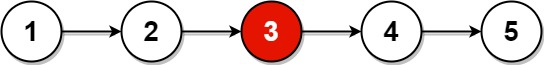
```
Input: head = [1,2,3,4,5]
Output: [3,4,5]
Explanation: The middle node of the list is node 3.
```

<b>Example 2</b>
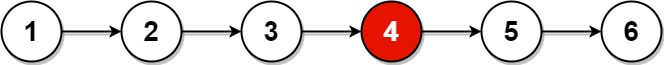
```
Input: head = [1,2,3,4,5,6]
Output: [4,5,6]
Explanation: Since the list has two middle nodes with values 3 and 4, we return the second one.
```


### 19. Remove Nth Node From End of List

Given the `head` of a linked list, remove the n<sup>th</sup> node from the end of the list and return its head.

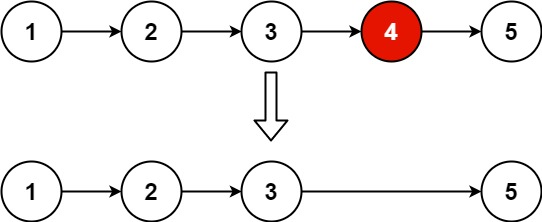
```
Input: head = [1,2,3,4,5], n = 2
Output: [1,2,3,5]
```